In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import timedelta
from dateutil.parser import parse

data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_28854/278595787.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Load mobility data files

### Load/Clean Simple Heatwave Data

In [2]:
#heatwave_control = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/heatwave_control/heatwave_control_90_v2.csv')
heatwave_control = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_heatwave_control_90.csv')

In [3]:
heatwave_control

,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,datetime,number,spatial_ref,t2m,d2m,rh,...,location,datetime_ord,pct,level_0,heatwave,heat_ID,Heat Wave Duration,control_day,day_of_week,num_iters
0,0,0,52,668,2022-06-18,0.0,0.0,33.937317,17.242651,69.135350,...,"Bas-Rhin, Alsace",738324,0.985621,52.0,1.0,19c9032a-7ba3-4591-b995-51e09d96c46d,2.0,2022-06-11,5,0
1,1,1,53,669,2022-06-19,0.0,0.0,33.864280,17.083223,59.446316,...,"Bas-Rhin, Alsace",738325,0.986928,53.0,1.0,19c9032a-7ba3-4591-b995-51e09d96c46d,NaN,2022-06-12,6,0
2,2,2,54,698,2022-07-18,0.0,0.0,32.428665,12.980786,57.088750,...,"Bas-Rhin, Alsace",738354,0.947712,54.0,1.0,5d2356d8-fc91-4fdd-be2c-bbec4ec5f4e9,3.0,2022-07-11,0,0
3,3,3,55,699,2022-07-19,0.0,0.0,35.339080,14.439025,54.504530,...,"Bas-Rhin, Alsace",738355,0.993464,55.0,1.0,5d2356d8-fc91-4fdd-be2c-bbec4ec5f4e9,NaN,2022-07-12,1,0
4,4,4,56,700,2022-07-20,0.0,0.0,31.419022,19.589756,89.217390,...,"Bas-Rhin, Alsace",738356,0.964706,56.0,1.0,5d2356d8-fc91-4fdd-be2c-bbec4ec5f4e9,NaN,2022-07-06,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,1903,1903,6239,74345,2022-08-09,0.0,0.0,23.270008,10.441143,74.982574,...,"Savoie, Rhône-Alpes",738376,0.911111,64.0,1.0,099ff6ac-e8c3-4d58-b894-5b1e65cef2dd,5.0,2022-07-26,1,0
1904,1904,1904,6240,74346,2022-08-10,0.0,0.0,23.166502,9.301332,78.793205,...,"Savoie, Rhône-Alpes",738377,0.901961,65.0,1.0,099ff6ac-e8c3-4d58-b894-5b1e65cef2dd,NaN,2022-07-27,2,0
1905,1905,1905,6241,74347,2022-08-11,0.0,0.0,23.348175,9.171077,72.279430,...,"Savoie, Rhône-Alpes",738378,0.907190,66.0,1.0,099ff6ac-e8c3-4d58-b894-5b1e65cef2dd,NaN,2022-07-07,3,0
1906,1906,1906,6242,74348,2022-08-12,0.0,0.0,23.442045,8.501777,61.384647,...,"Savoie, Rhône-Alpes",738379,0.909804,67.0,1.0,099ff6ac-e8c3-4d58-b894-5b1e65cef2dd,NaN,2022-07-29,4,0


In [4]:
heatwave_control['datetime']

0       2022-06-18
1       2022-06-19
2       2022-07-18
3       2022-07-19
4       2022-07-20
           ...    
1903    2022-08-09
1904    2022-08-10
1905    2022-08-11
1906    2022-08-12
1907    2022-08-13
Name: datetime, Length: 1908, dtype: object

In [5]:
heatwave_control['control_day'] = [parse(x) for x in heatwave_control['control_day']]
heatwave_control['datetime'] = [parse(x) for x in heatwave_control['datetime']]

In [6]:
(heatwave_control['datetime'] - heatwave_control['control_day']).describe()

count                          1908
mean     11 days 12:18:06.792452830
std       7 days 03:55:18.799954536
min                 7 days 00:00:00
25%                 7 days 00:00:00
50%                 7 days 00:00:00
75%                14 days 00:00:00
max                56 days 00:00:00
dtype: object

In [7]:
heatwave_control['diff'] = (heatwave_control['datetime'] - heatwave_control['control_day'])

In [8]:
temp = pd.DataFrame(heatwave_control['diff'].value_counts()).sort_index()

In [9]:
temp.columns = ['Number of Instances']

Text(0, 0.5, 'Heat and Control Difference')

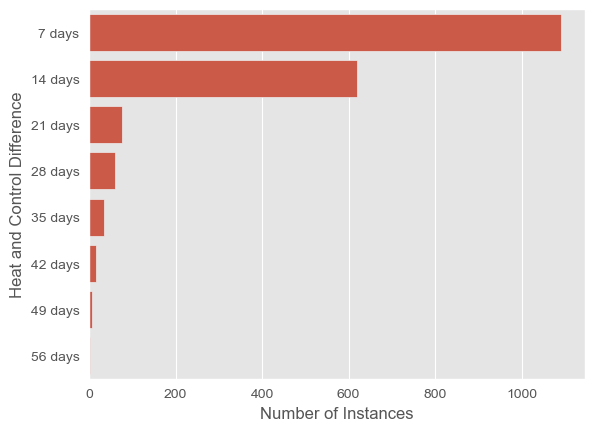

In [10]:
sns.barplot(temp, y=temp.index, x='Number of Instances')
plt.ylabel("Heat and Control Difference")

### Merge Mobility with Heat Data

In [11]:
mobility = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/google_mobility/clean/france_clean.csv')  

In [12]:
mobility.drop_duplicates(['location', 'date'], inplace=True)

In [13]:
mobility['date'] = pd.to_datetime(mobility['date'])

In [14]:
#merge mobility data with heatwave and control day data
mobility_heat = mobility.merge(heatwave_control[['control_day', 'thi', 'location', 'datetime', 'heat_ID']], left_on=['location', 'date'], right_on=['location', 'datetime'])

In [15]:
#get mobility on control day
mobility_heat = mobility_heat.merge(mobility[['location', 'date', 'retail_rec', 'grocery_pharm', 'parks', 'transit', 'workplaces', 'residential']], left_on=['location', 'control_day'], right_on=['location', 'date'], suffixes=['_heat', '_control'])

In [16]:
#calculate differences between heat and control 
mobility_heat['retail_rec_difference'] = mobility_heat['retail_rec_heat'] - mobility_heat['retail_rec_control']
mobility_heat['grocery_pharm_difference'] = mobility_heat['grocery_pharm_heat'] - mobility_heat['grocery_pharm_control']
mobility_heat['parks_difference'] = mobility_heat['parks_heat'] - mobility_heat['parks_control']
mobility_heat['transit_difference'] = mobility_heat['transit_heat'] - mobility_heat['transit_control']
mobility_heat['workplaces_difference'] = mobility_heat['workplaces_heat'] - mobility_heat['workplaces_control']
mobility_heat['residential_difference'] = mobility_heat['residential_heat'] - mobility_heat['residential_control']

In [17]:
mobility_heat['day_of_week'] = [x.day_of_week for x in mobility_heat['date_heat']]
mobility_heat['weekend'] = [1 if x in [5,6] else 0 for x in mobility_heat['day_of_week']]

In [18]:
mobility_heat.reset_index(drop=True,inplace=True)

In [19]:
mobility_heat

,Unnamed: 0,adm0,adm1,adm2,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,...,workplaces_control,residential_control,retail_rec_difference,grocery_pharm_difference,parks_difference,transit_difference,workplaces_difference,residential_difference,day_of_week,weekend
0,168,France,Alsace,Bas-Rhin,FR,France,Grand Est,Bas-Rhin,NaN,FR-67,...,-4,-3.0,-7.0,-1.0,-2.0,1.0,-3,1.0,5,1
1,169,France,Alsace,Bas-Rhin,FR,France,Grand Est,Bas-Rhin,NaN,FR-67,...,7,-5.0,-12.0,-6.0,-31.0,1.0,-4,1.0,6,1
2,198,France,Alsace,Bas-Rhin,FR,France,Grand Est,Bas-Rhin,NaN,FR-67,...,-30,3.0,-9.0,-3.0,-11.0,-4.0,-4,3.0,0,0
3,205,France,Alsace,Bas-Rhin,FR,France,Grand Est,Bas-Rhin,NaN,FR-67,...,-30,3.0,-9.0,-6.0,-15.0,-7.0,-7,3.0,0,0
4,199,France,Alsace,Bas-Rhin,FR,France,Grand Est,Bas-Rhin,NaN,FR-67,...,-29,3.0,-12.0,-11.0,-13.0,-5.0,-5,11.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,27574,France,Rhône-Alpes,Savoie,FR,France,Auvergne-Rhône-Alpes,Savoie,NaN,FR-73,...,-23,2.0,3.0,9.0,28.0,-3.0,-8,1.0,2,0
1797,27581,France,Rhône-Alpes,Savoie,FR,France,Auvergne-Rhône-Alpes,Savoie,NaN,FR-73,...,-23,2.0,7.0,13.0,47.0,1.0,-14,2.0,2,0
1798,27576,France,Rhône-Alpes,Savoie,FR,France,Auvergne-Rhône-Alpes,Savoie,NaN,FR-73,...,-27,6.0,3.0,4.0,41.0,-2.0,-7,0.0,4,0
1799,27583,France,Rhône-Alpes,Savoie,FR,France,Auvergne-Rhône-Alpes,Savoie,NaN,FR-73,...,-27,6.0,5.0,6.0,74.0,0.0,-12,0.0,4,0


In [20]:
mobility_heat.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_clean_90.csv')